# Module 1.

##  Steps to perform Data Pre-processing: 

#### Step 1: Removing duplicate rows ( there could be duplicate rows excluding Row_ID column ).
#### Step 2: Removing rows for which few values are missing.
#### Step 3: Remove irrelevant values from each column if any. Validation of all values for a column( order date and ship date value must be in correct date format ). For each entry in dataset ship date >= order date
#### Step 4: Export the cleaned dataset as a .csv file: prefer UTF-8 encoding.

# Table of content

##### Import librarries
##### Read dataset
##### Get information about data
##### Data cleaning
##### Data visualization & getting conclusions
##### Final report

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Read dataset 

In [2]:
df = pd.read_csv ("superstore_final_dataset.csv")

In [3]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
df.sample(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
400,401,CA-2017-108987,08-09-2017,10-09-2017,Second Class,AG-10675,Anna Gayman,Consumer,United States,Houston,Texas,77036.0,Central,OFF-ST-10000934,Office Supplies,Storage,Contico 72H Heavy-Duty Storage System,131.136
9063,9064,US-2015-151015,14-10-2015,20-10-2015,Standard Class,BD-11500,Bradley Drucker,Consumer,United States,Chicago,Illinois,60653.0,Central,OFF-PA-10002581,Office Supplies,Paper,Xerox 1951,322.192
7973,7974,US-2016-126753,16-08-2016,20-08-2016,Standard Class,SP-20860,Sung Pak,Corporate,United States,Philadelphia,Pennsylvania,19134.0,East,OFF-BI-10003981,Office Supplies,Binders,Avery Durable Plastic 1 Binders,2.724
2218,2219,CA-2018-130841,28-07-2018,01-08-2018,Standard Class,MH-17620,Matt Hagelstein,Corporate,United States,San Francisco,California,94110.0,West,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,9.984
4700,4701,CA-2018-140298,11-05-2018,17-05-2018,Standard Class,JK-16120,Julie Kriz,Home Office,United States,Austin,Texas,78745.0,Central,OFF-ST-10004180,Office Supplies,Storage,Safco Commercial Shelving,74.416


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Data cleaning

In [7]:
#Un Necessary Columns

df.drop('Row_ID',axis=1,inplace=True)   # Unnecessary columns droped

In [8]:
df[df.duplicated()]  # Remove Duplicates

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
3406,US-2015-150119,23-04-2015,27-04-2015,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [9]:
df.drop_duplicates(inplace=True) # Duplicated rows droped

In [10]:
df.isnull().sum()

Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [11]:
# show all the null row in the postalcode column 
df[df['Postal_Code'].isnull()]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
2234,CA-2018-104066,05-12-2018,10-12-2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,07-11-2016,09-11-2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,06-04-2017,10-04-2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23-01-2017,27-01-2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23-01-2017,27-01-2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23-01-2017,27-01-2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19-01-2018,23-01-2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [12]:
#all missed postal codes is in america which equal 05401
df['Postal_Code'].fillna(5401,inplace=True)

In [13]:
df.isnull().sum().sum()   # Null data handled

0

### Columns DataTypes Validation

In [14]:
#validate columns types 
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Ship_Date']=pd.to_datetime(df['Ship_Date'])

C:\Users\Siddhesh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Siddhesh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-11-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Siddhesh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-05-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Siddhesh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-08-2015' in DD/MM/YYYY format. Provide form

#### Columns types is valid

### Data visualization & getting conclusions

In [53]:
top_cities= df.groupby("City").sum().sort_values("Sales",ascending=False).head(15)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
top_cities

fig=px.bar(top_cities,x='City',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.Rainbow)
fig.show()

### New york city have the most sales

In [52]:
top_states= df.groupby("State").sum().sort_values("Sales",ascending=False).head(15)
top_states= top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
top_states
fig=px.bar(top_states,x='State',y='Sales',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.Cividis)
fig.show()

### California have the most sales

In [18]:
fig = px.pie(df, values=np.ones(9799), names='Ship_Mode', title='Ship_Mode',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Standard Class was the most common ship mode

In [51]:
fig = px.pie(df, values=np.ones(9799), names='Segment', title='Segment',color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.show()

### Most orders was from consumers

In [22]:
fig = px.pie(df, values=np.ones(9799), names='Category', title='Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Most orders was of Office Suppliers

In [50]:
Categoris= df.groupby("Category").sum().sort_values("Sales",ascending=False).head(15)
Categoris= Categoris[['Sales']].round(2)
Categoris.reset_index(inplace=True)

fig = px.pie(Categoris, values='Sales', names='Category', title='Categoris sales',color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.show()

### Technological products have the most sales

In [25]:
fig = px.pie(df, values=np.ones(9799), names='Sub_Category', title='Sub_Category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Most orders was of Binders

In [26]:
regions= df.groupby("Region").sum().sort_values("Sales",ascending=False)
regions= regions[['Sales']].round(2)
regions.reset_index(inplace=True)

fig=px.pie(regions,names='Region',values='Sales',title="Regions Sales",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Most sales was from the West Region

In [35]:
import plotly.express as px

In [49]:
Segments= df.groupby("Segment").sum().sort_values("Sales",ascending=False)
Segments= Segments[['Sales']].round(2)
Segments.reset_index(inplace=True)

fig=px.pie(Segments,names='Segment',values='Sales',title="Segments Sales",color_discrete_sequence=px.colors.sequential.Sunsetdark)
fig.show()

### Most sales was from the consumers

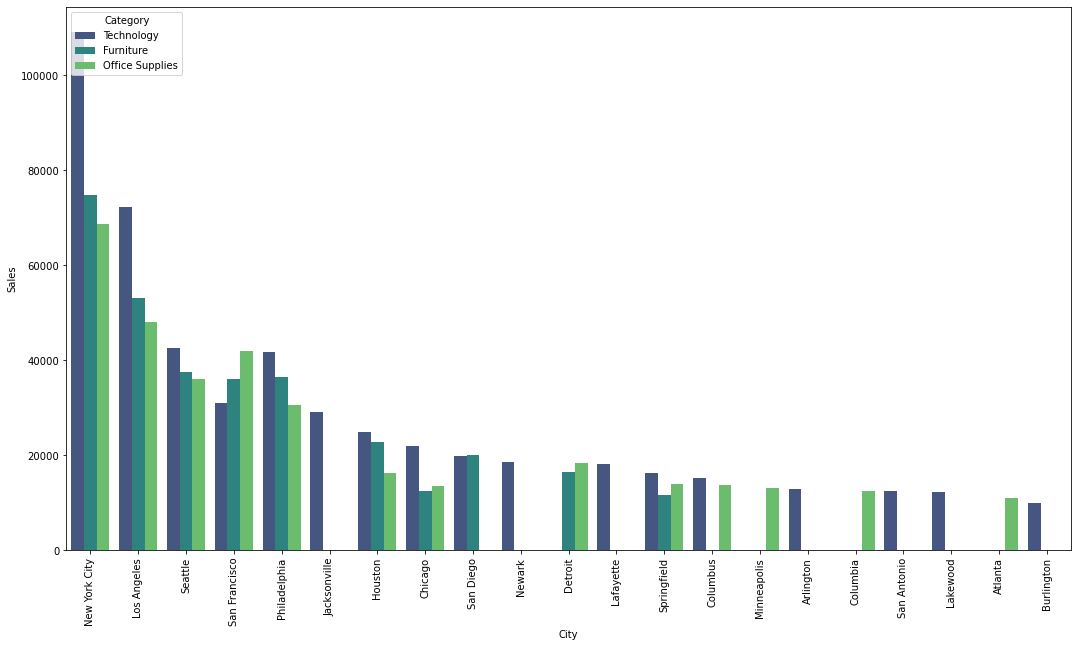

In [30]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Category"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Category',data=top_cities,palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

### As we see in the figure the most common ctegory in every city which help in markting in the common product for each city

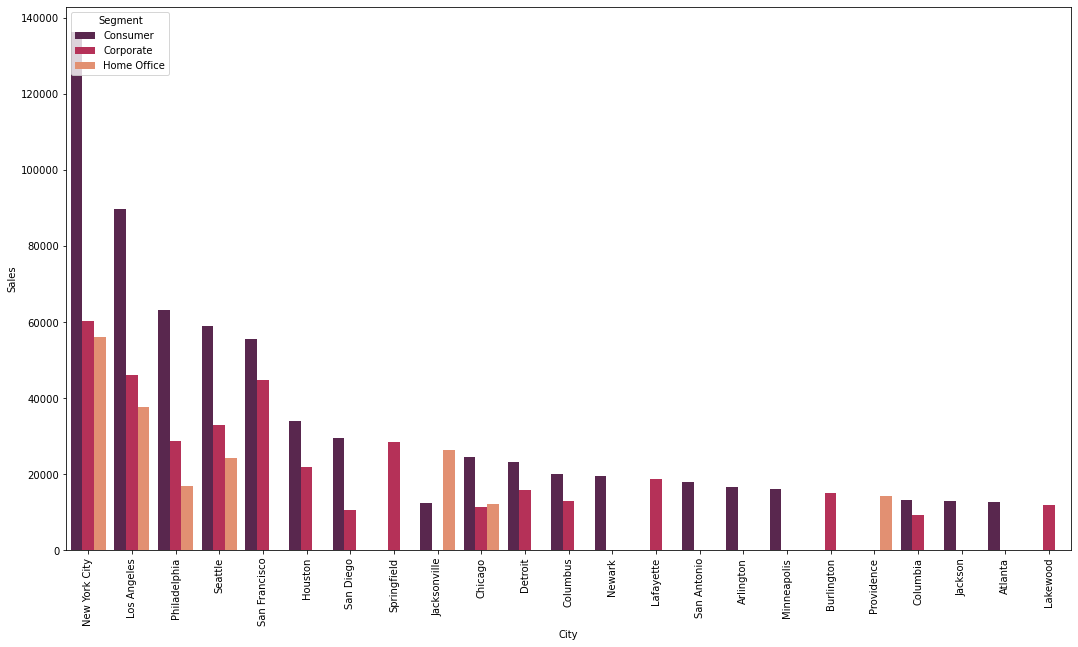

In [60]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Segment"]).sum().sort_values("Sales",ascending=False).head(40)
top_cities= top_cities[['Sales']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales',hue='Segment',data=top_cities,palette="rocket")
plt.xticks(rotation='vertical')
plt.show()

### In the figure we can see the most common segment type in every city

### Export the cleaned dataset as a .csv file: prefer UTF-8 encoding.

In [63]:
# converting to CSV file
df.to_csv("Cleaned_Superstore_Sales.csv")

In [64]:
# converting to CSV file
df.to_csv("Cleaned_Superstore_Sales.csv", encoding = 'utf-8', index = False)